## ***Heart Disease Practice Challenge - Provisioning***

First I need to import the libraries that I am going to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pyl
import missingno as msno # To visualize missing value

%matplotlib inline 

I am going to investigate 4 different datasets. After that I will combine these 4 dataset and investigate again

## **General Information**

### **Attribute Information**


Acronym | Description
---|---
Age | Age in years
Sex | Sex(1 = male; 0 = female)
Cp | Chest pain type value 1: typical angina, 2: atypical angina, 3: non-anginal pain , 4: asymptomatic 
Trestbps | Resting blood pressure (in mm Hg on admission to the hospital) 
Chol | Serum cholestoral in mg/dl 
Fbs | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
Restecg | Resting electrocardiographic results  value 0: normal 1: having ST-T wave abnormality 
| Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
Thalach | Maximum heart rate achieved 
Exang | Exercise induced angina (1 = yes; 0 = no) 
Oldpeak | ST depression induced by exercise relative to rest 
Slope |  the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
Ca | Number of major vessels (0-3) colored by flourosopy 
Thal | 3 = normal; 6 = fixed defect; 7 = reversable defect 
Num(the predicted attribute) | diagnosis of heart disease (0: < 50% diameter narrowing;1: > 50% diameter narrowing)   

The variables types are:

    - Binary: sex, fbs, exang, target
    - Categorical: cp, restecg, slope, ca, thal
    - Continuous: age, trestbps, chol, thalac, oldpeak

## ***Cleveland***

## **Data Understanding**

Import the data

In [2]:
df_cleveland = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header= None)

Give headers to the data

In [3]:
df_cleveland.columns = ['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num']

Lets check the first 5 rows of the data

In [4]:
df_cleveland.head(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Lets check the last 5 rows of the data

In [5]:
df_cleveland.tail(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [6]:
df_cleveland.shape

(303, 14)

It can bee seen that we have 303 rows with 14 variables

In [7]:
df_cleveland.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num'],
      dtype='object')

In [8]:
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   Cp        303 non-null    float64
 3   Trestbps  303 non-null    float64
 4   Chol      303 non-null    float64
 5   Fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   Thalach   303 non-null    float64
 8   Exang     303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    float64
 11  Ca        303 non-null    object 
 12  Thal      303 non-null    object 
 13  Num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## **Data Cleaning**

In [9]:
df_cleveland.nunique()

Age          41
Sex           2
Cp            4
Trestbps     50
Chol        152
Fbs           2
Restecg       3
Thalach      91
Exang         2
Oldpeak      40
Slope         3
Ca            5
Thal          4
Num           5
dtype: int64

We can see the number of unique values that each column has

My first impression is that there are 5 unique values in the our Target column which is Num, However, we want to find out wheter a patient has a heart disease or not. Therefore, we must have 2 choices, mainly "Yes" or "No"

In [10]:
df_cleveland.dtypes

Age         float64
Sex         float64
Cp          float64
Trestbps    float64
Chol        float64
Fbs         float64
Restecg     float64
Thalach     float64
Exang       float64
Oldpeak     float64
Slope       float64
Ca           object
Thal         object
Num           int64
dtype: object

We can see the each columns datatypes by calling either dtypes or info method on the dataframe

Moreover, we can see that from the data that there are some values of "?". I am going to replace this value with NaN.

In [11]:
df_cleveland = df_cleveland.replace('?', np.nan) 

In [12]:
df_cleveland

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


We can see that the "?" values replaced with NaN

Let's check how many NaN values we have

In [13]:
df_cleveland.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          4
Thal        2
Num         0
dtype: int64

We can see that we have 6 values of NaN

<AxesSubplot:>

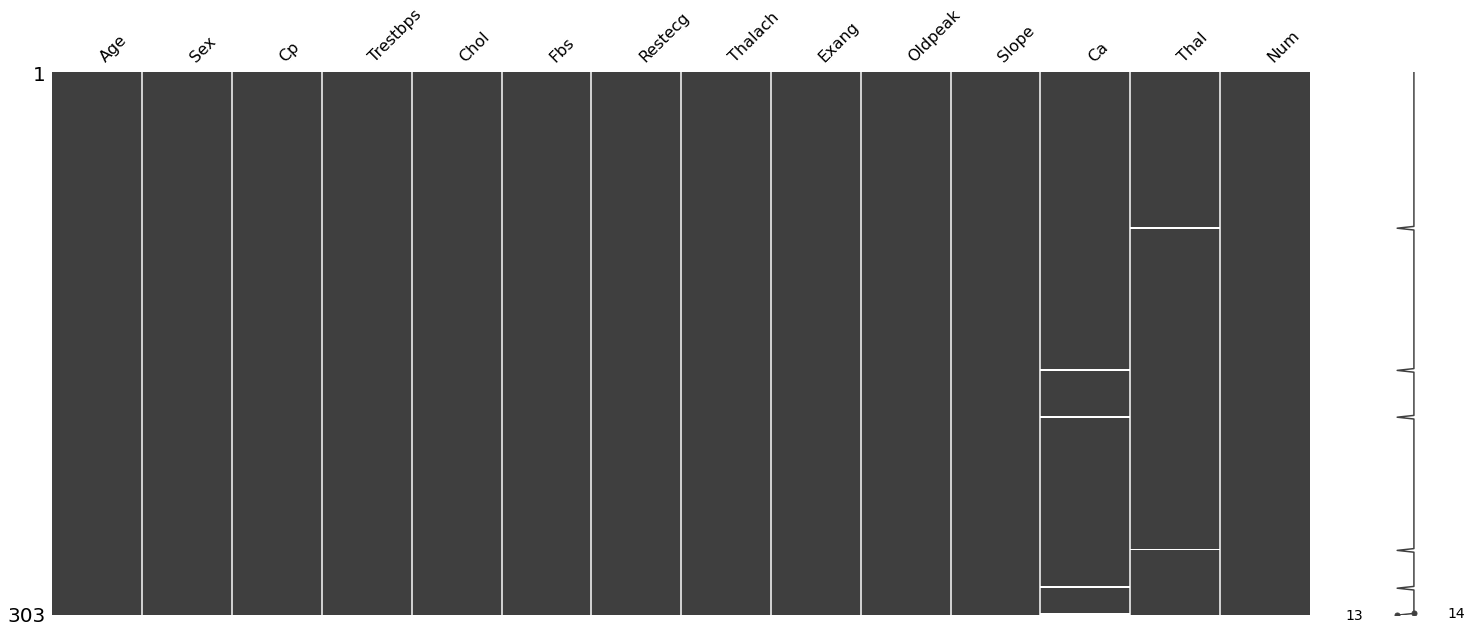

In [14]:
msno.matrix(df_cleveland)

We can also see missing values using missingno

The missing values seem to be pretty appeared randomly. They look like MCAR.

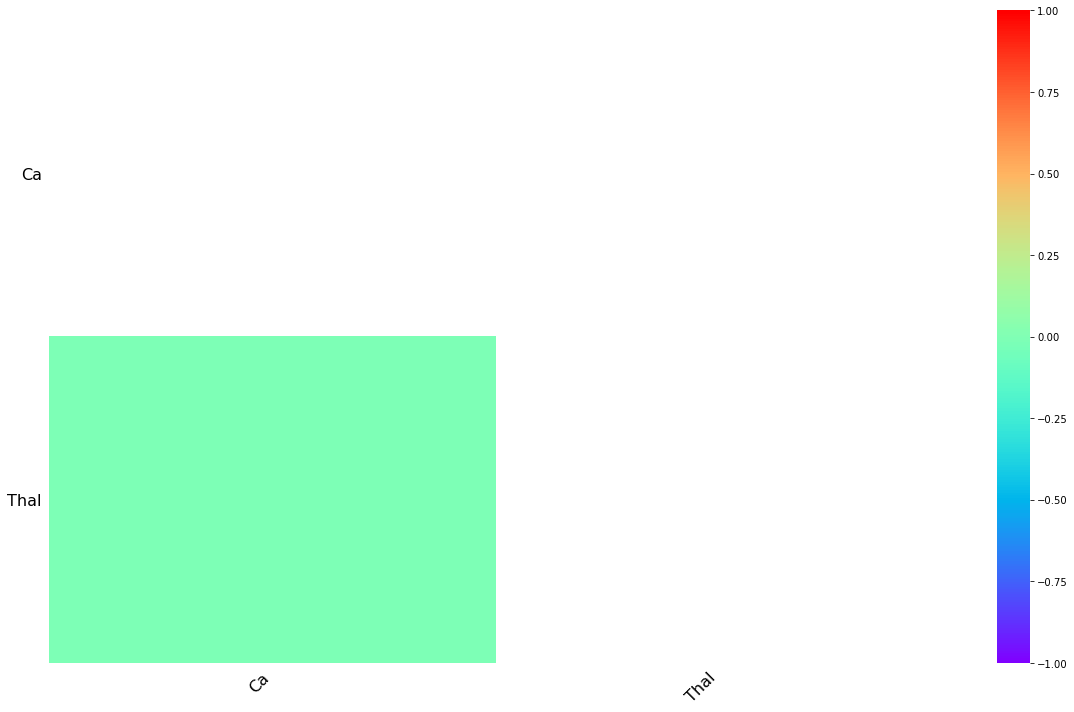

In [15]:
msno.heatmap(df_cleveland, cmap='rainbow');

To find out if the missingness has any correlation with any of the existing variables, I will use a correlation heatmap.

The heatmap shows no score which also suggests complete randomness MCAR. Because these columns are categorical we can use mode.

In [16]:
df_cleveland.duplicated().sum()

0

We have 0 duplicated rows

In [17]:
df_cleveland.describe()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


This can be give us a overview of the statistics of the data. We can spot some wrong information such as if the Thalac(Heart rate) is 0, we can say that it is not possible therefore, something is wrong with the data.

For this exercise, I am going to fill the NaN fields with the mean values of the columns. But first we have to change the datatype of thal and ca to a numerical value.

In [18]:
df_cleveland['Num'].nunique()

5

In [19]:
df_cleveland['Num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Num, dtype: int64

In [20]:
df_cleveland['Num'] = df_cleveland.Num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

We want to find that if the patient has a hearth disease or not so it is a yes or no question meaning it is a Classification problem. 0: No Diesease 1: Disease

In [21]:
df_cleveland["Ca"] = pd.to_numeric(df_cleveland["Ca"])

In [22]:
df_cleveland["Thal"] = pd.to_numeric(df_cleveland["Thal"])

We changed the object datatype to numerical datatype Lets see by calling info() method again

In [23]:
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   Cp        303 non-null    float64
 3   Trestbps  303 non-null    float64
 4   Chol      303 non-null    float64
 5   Fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   Thalach   303 non-null    float64
 8   Exang     303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    float64
 11  Ca        299 non-null    float64
 12  Thal      301 non-null    float64
 13  Num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Now Ca and Thal columns turned into float datatype. Now we will be replacing NaN values with mode values.

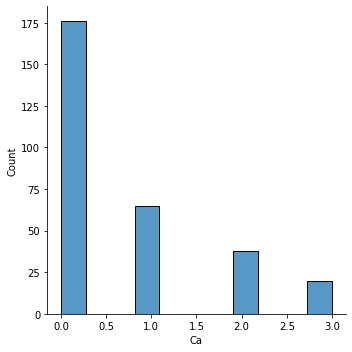

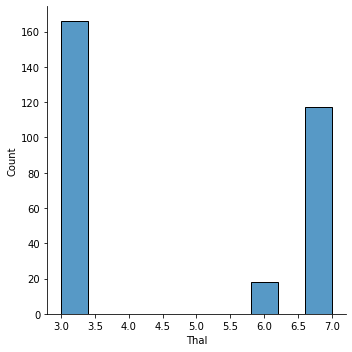

In [24]:
cleveland_missing=["Ca","Thal"]

for i in cleveland_missing:
    sns.displot(df_cleveland,x = i)
    
plt.tight_layout()

We can also see from the plot that Thal and Ca are categorical, therefore, we can use mode imputation.

In [25]:
df_cleveland['Thal'] = df_cleveland.Thal.fillna(df_cleveland.Thal.mode()[0])


In [26]:
df_cleveland['Ca'] = df_cleveland.Ca.fillna(df_cleveland.Ca.mode()[0])

In [27]:
df_cleveland

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [28]:
df_cleveland.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Num         0
dtype: int64

We have 0 NaN/missing values and we replaced these with mean values. Another approach could be removing the rows from the data. However, because our data is small 303x14 I wanted to not to remove the rows.

### **Outliers**

I am going to find outliers and remove them.
- Q3 is the median of the upper half of the data
- Q1 is the median of the lower half of the data
- IQR is the difference between Q3-Q1
- Outliers can be found as [Q1-1.5IQR,Q3+1.5IQR]

In [29]:
# define continuous variable & plot
continous_features = ['Age','Trestbps','Chol','Thalach','Oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_cleveland.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df_cleveland[continous_features])

For the feature Age, No of Outliers is 0
For the feature Trestbps, No of Outliers is 9
For the feature Chol, No of Outliers is 5
For the feature Thalach, No of Outliers is 1
For the feature Oldpeak, No of Outliers is 5


We have several outliers in the dataset

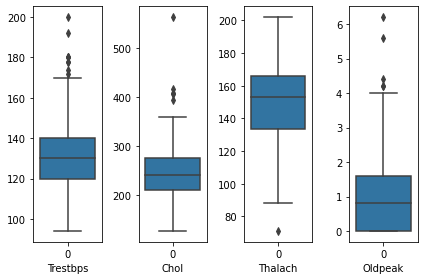

In [30]:
ig, axes = plt.subplots(1,4)
count = 0
for each_feature in continous_features[1:]:
    feature_data = df_cleveland[each_feature]
    ax = sns.boxplot(data = feature_data, orient='v', ax=axes[count])
    ax.set(xlabel='{}'.format(each_feature))
    count+=1

plt.tight_layout()

We can also see the outliers in the boxplot

In [31]:
outliers(df_cleveland[continous_features], drop=True)

Outliers from Age feature removed
Outliers from Trestbps feature removed
Outliers from Chol feature removed
Outliers from Thalach feature removed
Outliers from Oldpeak feature removed


Removing outliers will give us more more strong correlations.

### **Correlations**

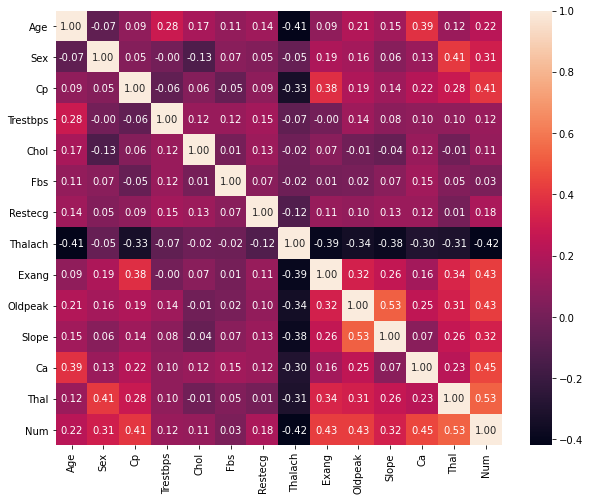

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cleveland.corr(),cbar=True,
    annot=True,fmt='.2f',
  )
plt.show()

We can say that Thal and Cp have a good positive correlation with Num. On the other hand thalac has a good negative correlation with Num.
Fbs, Chol has a low correlation with Num.

### **Data Visualization**

It is good to replace numbers with text in order to understand the graphs better.

In [33]:
df_cleveland['Num'] = df_cleveland.Num.replace({1: "Disease", 0: "No disease"})
df_cleveland['Sex'] = df_cleveland.Sex.replace({1: "Male", 0: "Female"})
df_cleveland['Cp'] = df_cleveland.Cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})

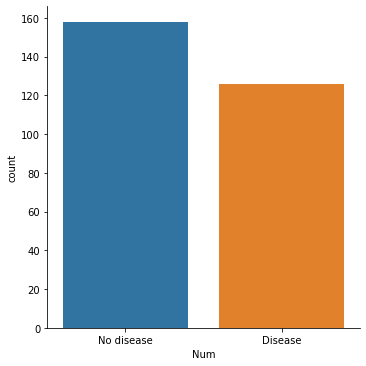

In [34]:
sns.catplot(kind="count", x="Num", data= df_cleveland)
plt.show()

An overview of the number of patients who has a heart disease or not

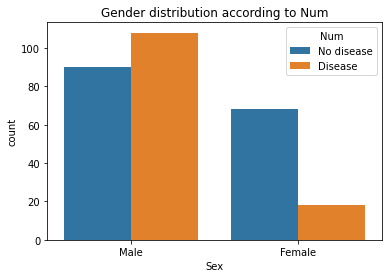

In [35]:
sns.countplot(x = 'Sex', data = df_cleveland, hue = 'Num')
plt.title('Gender distribution according to Num')
plt.show()

We can see the number of male and female who are suffering from heart disease.

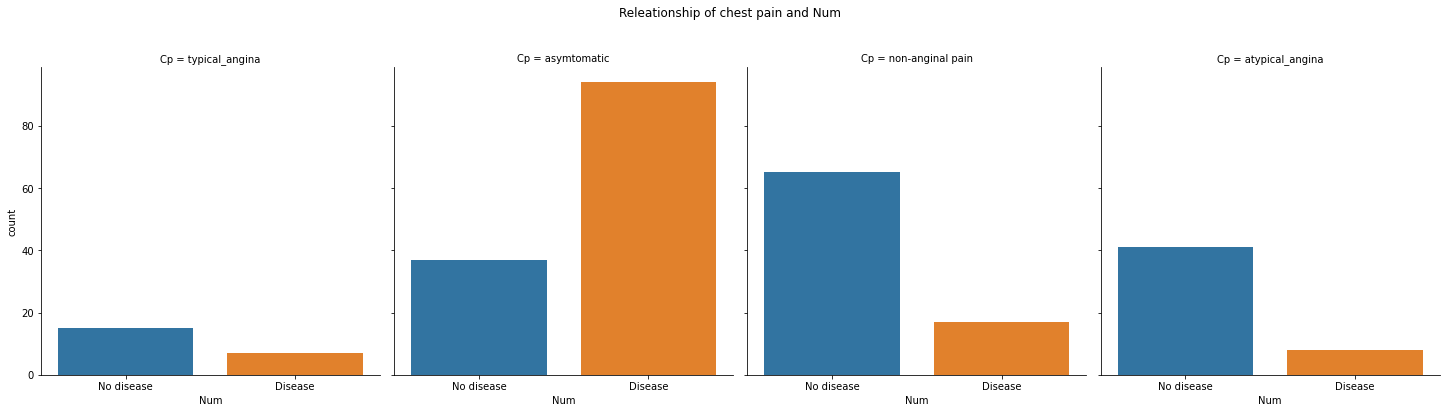

In [36]:
g= sns.catplot(kind = 'count', data = df_cleveland, x = 'Num', col="Cp")
g.fig.suptitle("Releationship of chest pain and Num",y=1.1)
plt.show()

## ***Switzerland***

Now, I am going to repeat the steps above.

In [37]:
df_switzerland = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", header= None)

In [38]:
df_switzerland.columns = ['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num']
df_switzerland.head(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [39]:
df_switzerland.tail(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1
122,74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


In [40]:
df_switzerland.shape

(123, 14)

In [41]:
df_switzerland.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num'],
      dtype='object')

In [42]:
df_switzerland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       123 non-null    int64 
 1   Sex       123 non-null    int64 
 2   Cp        123 non-null    int64 
 3   Trestbps  123 non-null    object
 4   Chol      123 non-null    int64 
 5   Fbs       123 non-null    object
 6   Restecg   123 non-null    object
 7   Thalach   123 non-null    object
 8   Exang     123 non-null    object
 9   Oldpeak   123 non-null    object
 10  Slope     123 non-null    object
 11  Ca        123 non-null    object
 12  Thal      123 non-null    object
 13  Num       123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


In [43]:
df_switzerland.nunique()

Age         37
Sex          2
Cp           4
Trestbps    21
Chol         1
Fbs          3
Restecg      4
Thalach     68
Exang        3
Oldpeak     36
Slope        4
Ca           3
Thal         4
Num          5
dtype: int64

Lets replace "?" values with NaN

We can see that the Chol(Serum cholestoral) column is 0 which is not right. So I will replace the column with NaN 

In [44]:
df_switzerland['Chol'] = np.nan
df_switzerland

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,32,1,1,95,NaN,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,NaN,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,NaN,?,0,130,1,?,?,?,7,3
3,36,1,4,110,NaN,?,0,125,1,1,2,?,6,1
4,38,0,4,105,NaN,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,NaN,0,1,92,1,0,2,?,7,1
119,70,1,4,140,NaN,1,0,157,1,2,2,?,7,3
120,72,1,3,160,NaN,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,NaN,0,1,121,0,0,1,?,3,1


In [45]:
df_switzerland = df_switzerland.replace('?', np.nan) 

In [46]:
df_switzerland.isnull().sum()

Age           0
Sex           0
Cp            0
Trestbps      2
Chol        123
Fbs          75
Restecg       1
Thalach       1
Exang         1
Oldpeak       6
Slope        17
Ca          118
Thal         52
Num           0
dtype: int64

We can see that we are lots of missing values.

In [47]:
df_switzerland.isnull().mean() * 100

Age           0.000000
Sex           0.000000
Cp            0.000000
Trestbps      1.626016
Chol        100.000000
Fbs          60.975610
Restecg       0.813008
Thalach       0.813008
Exang         0.813008
Oldpeak       4.878049
Slope        13.821138
Ca           95.934959
Thal         42.276423
Num           0.000000
dtype: float64

We can see the percentages of the missing data.

<AxesSubplot:>

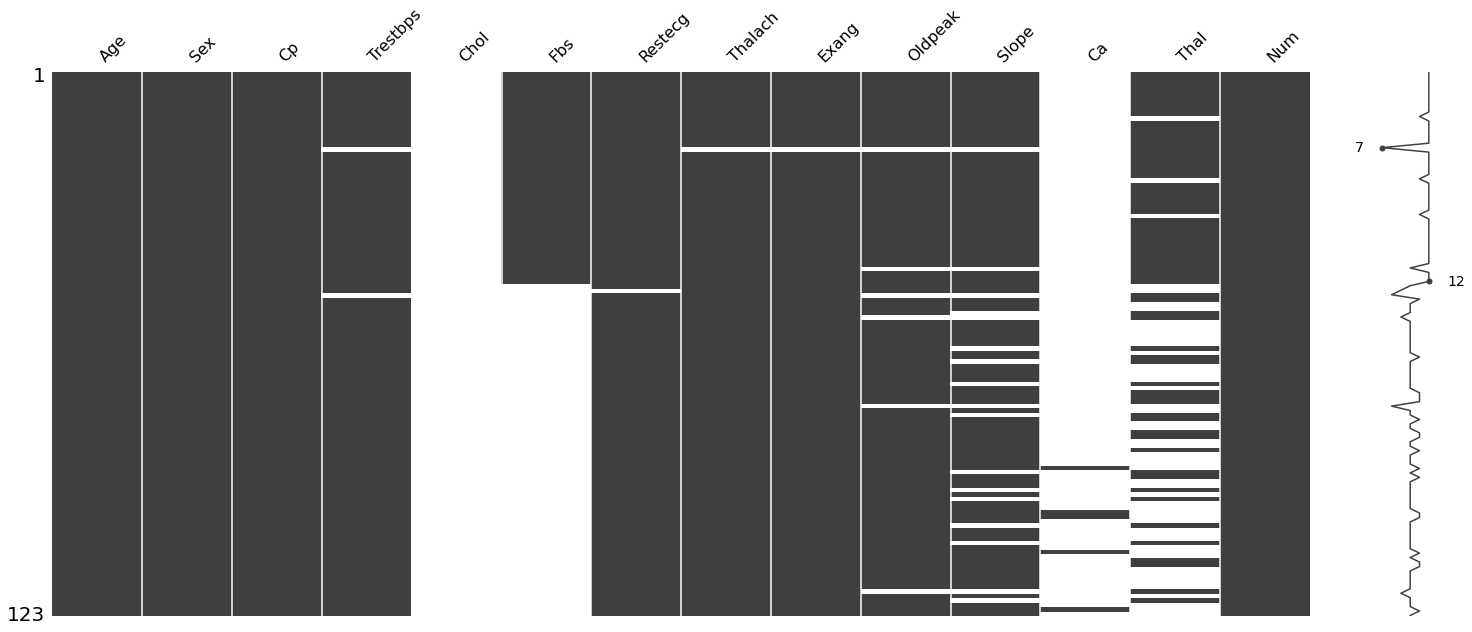

In [48]:
msno.matrix(df_switzerland.sort_values('Fbs'))

We can also see missing values using missingno

- We can see that even Trestbps, Restecg, Thalach,Exang, Oldpeak and Slope has some correlation of missingness, We can assume the missingness if MAR.
- It can be seen by sorting by Fbs that It has some correlation with missing values is Thal. We can also say missingness could be MAR. However, in order to determine missingless completely, more domain understanding is needed.

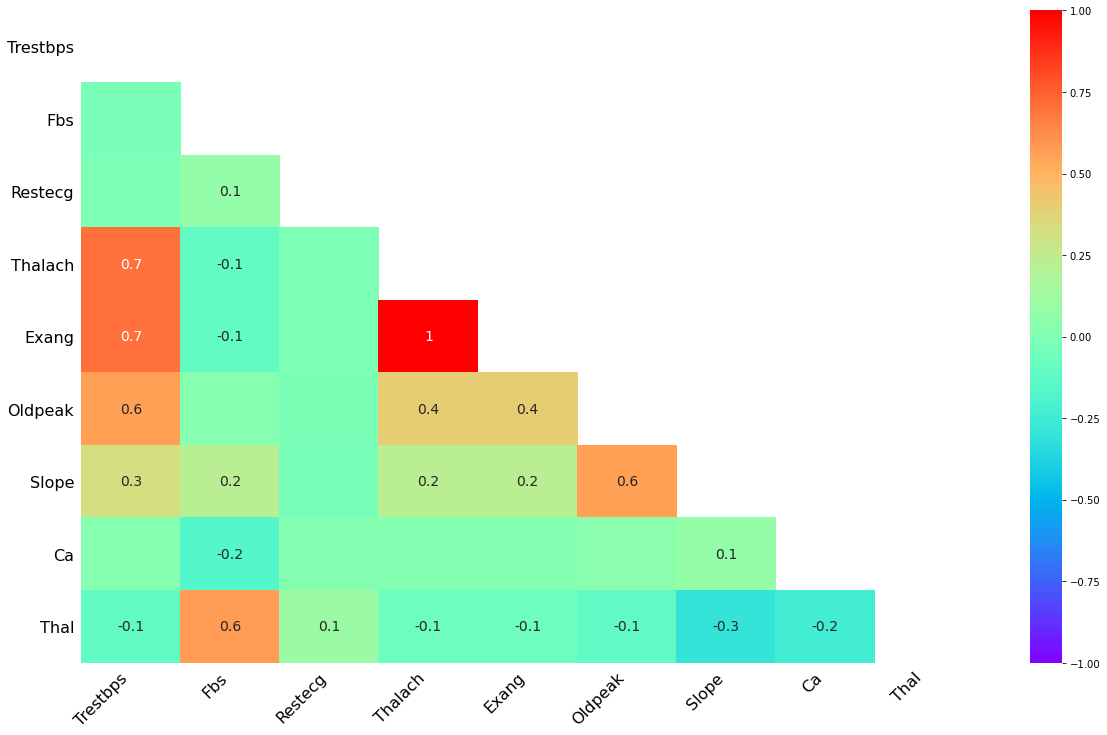

In [49]:
msno.heatmap(df_switzerland, cmap='rainbow');

This heatmap shows correlations of missing values between columns

- We can also say that Fbs and Thal has correlation of 0.6 which also supports MAR.
- Furthermore we can see from here and from matrix that Chol column is completely missing therefore missingness probably MNAR.

In [50]:
df_switzerland.duplicated().sum()

0

In [51]:
df_switzerland.describe()

,Age,Sex,Cp,Chol,Num
count,123.000000,123.000000,123.000000,0.0,123.000000
mean,55.317073,0.918699,3.699187,NaN,1.804878
std,9.032108,0.274414,0.688726,NaN,1.013503
min,32.000000,0.000000,1.000000,NaN,0.000000
25%,51.000000,1.000000,4.000000,NaN,1.000000
50%,56.000000,1.000000,4.000000,NaN,2.000000
75%,61.500000,1.000000,4.000000,NaN,3.000000
max,74.000000,1.000000,4.000000,NaN,4.000000


In [52]:
df_switzerland

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,32,1,1,95,NaN,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,NaN,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,NaN,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,NaN,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,NaN,NaN,0,166,0,2.8,1,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,NaN,0,1,92,1,0,2,NaN,7,1
119,70,1,4,140,NaN,1,0,157,1,2,2,NaN,7,3
120,72,1,3,160,NaN,NaN,2,114,0,1.6,2,2,NaN,0
121,73,0,3,160,NaN,0,1,121,0,0,1,NaN,3,1


In [53]:
df_switzerland['Num'].nunique()

5

In [54]:
df_switzerland['Num'].value_counts()

1    48
2    32
3    30
0     8
4     5
Name: Num, dtype: int64

In [55]:
df_switzerland['Num'] = df_switzerland.Num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [56]:
df_switzerland = df_switzerland.apply(pd.to_numeric, errors='coerce')

This way we can transform datatype of all columns to numeric.

In [57]:
df_switzerland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       123 non-null    int64  
 1   Sex       123 non-null    int64  
 2   Cp        123 non-null    int64  
 3   Trestbps  121 non-null    float64
 4   Chol      0 non-null      float64
 5   Fbs       48 non-null     float64
 6   Restecg   122 non-null    float64
 7   Thalach   122 non-null    float64
 8   Exang     122 non-null    float64
 9   Oldpeak   117 non-null    float64
 10  Slope     106 non-null    float64
 11  Ca        5 non-null      float64
 12  Thal      71 non-null     float64
 13  Num       123 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 13.6 KB


Now, they are all in numeric form

We have 118 missing values for Ca, 75 missing values for Fbs and 52 missing value with Tha. These number quite a lot so I am going to remove these columns.

In [58]:
df_switzerland.drop('Ca', axis=1, inplace=True)
df_switzerland.drop('Thal', axis=1, inplace=True)
df_switzerland.drop('Fbs', axis=1, inplace=True)
df_switzerland.drop('Chol', axis=1, inplace=True)
df_switzerland

,Age,Sex,Cp,Trestbps,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,32,1,1,95.0,0.0,127.0,0.0,0.7,1.0,1
1,34,1,4,115.0,NaN,154.0,0.0,0.2,1.0,1
2,35,1,4,NaN,0.0,130.0,1.0,NaN,NaN,1
3,36,1,4,110.0,0.0,125.0,1.0,1.0,2.0,1
4,38,0,4,105.0,0.0,166.0,0.0,2.8,1.0,1
...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,1.0,92.0,1.0,0.0,2.0,1
119,70,1,4,140.0,0.0,157.0,1.0,2.0,2.0,1
120,72,1,3,160.0,2.0,114.0,0.0,1.6,2.0,0
121,73,0,3,160.0,1.0,121.0,0.0,0.0,1.0,1


Now, I am going to fill the missing values with mean.

In [59]:
df_switzerland.isnull().sum()

Age          0
Sex          0
Cp           0
Trestbps     2
Restecg      1
Thalach      1
Exang        1
Oldpeak      6
Slope       17
Num          0
dtype: int64

Lets check the distribution of the missing data

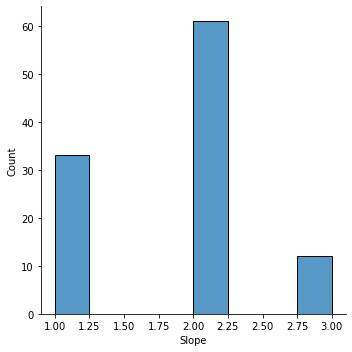

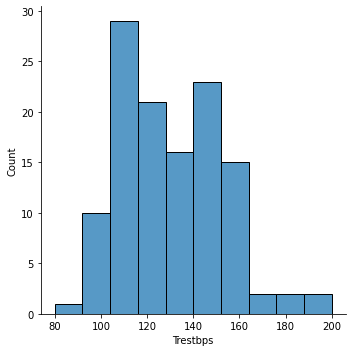

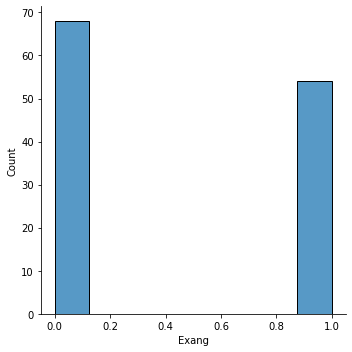

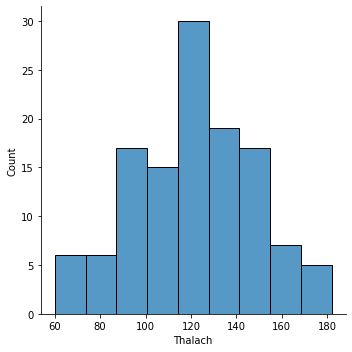

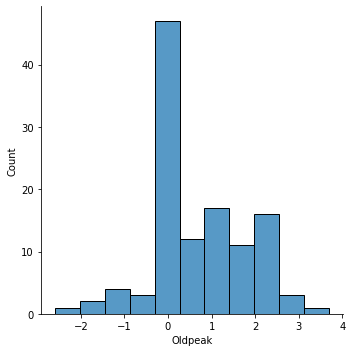

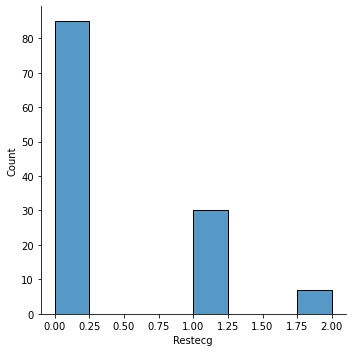

In [60]:
switzerland_missing=["Slope","Trestbps","Exang","Thalach","Oldpeak","Restecg"]

for i in switzerland_missing:
    sns.displot(df_switzerland,x = i)
    
plt.tight_layout()

- Olpeak is continuous and it look like symmetric distribution, therefore, we can use use mean.
- Thalac is also continuous and it look like symmetric distribution, therefore, we can use use mean.
- Trestbps is also continuous and it look like symmetric distribution, therefore, we can use use mean.
- Slope is categorical and therefore, It is good to use mode.
- Restecg is categorical and therefore, It is good to use mode.
- Exang is categorical and therefore, It is good to use mode.

In [61]:
df_switzerland['Slope'] = df_switzerland.Slope.fillna(df_switzerland.Slope.mode()[0])
df_switzerland['Trestbps'] = df_switzerland.Trestbps.fillna(df_switzerland.Trestbps.mean())
df_switzerland['Exang'] = df_switzerland.Exang.fillna(df_switzerland.Exang.mode()[0])
df_switzerland['Thalach'] = df_switzerland.Thalach.fillna(df_switzerland.Thalach.mean())
df_switzerland['Oldpeak'] = df_switzerland.Oldpeak.fillna(df_switzerland.Oldpeak.mean())
df_switzerland['Restecg'] = df_switzerland.Restecg.fillna(df_switzerland.Restecg.mode()[0])

In [62]:
df_switzerland

,Age,Sex,Cp,Trestbps,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,32,1,1,95.000000,0.0,127.0,0.0,0.700000,1.0,1
1,34,1,4,115.000000,0.0,154.0,0.0,0.200000,1.0,1
2,35,1,4,130.206612,0.0,130.0,1.0,0.653846,2.0,1
3,36,1,4,110.000000,0.0,125.0,1.0,1.000000,2.0,1
4,38,0,4,105.000000,0.0,166.0,0.0,2.800000,1.0,1
...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.000000,1.0,92.0,1.0,0.000000,2.0,1
119,70,1,4,140.000000,0.0,157.0,1.0,2.000000,2.0,1
120,72,1,3,160.000000,2.0,114.0,0.0,1.600000,2.0,0
121,73,0,3,160.000000,1.0,121.0,0.0,0.000000,1.0,1


In [63]:
df_switzerland.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Num         0
dtype: int64

### **Outliers**

I am going to find outliers and remove them.
- Q3 is the median of the upper half of the data
- Q1 is the median of the lower half of the data
- IQR is the difference between Q3-Q1
- Outliers can be found as [Q1-1.5IQR,Q3+1.5IQR]

In [64]:
# define continuous variable & plot
continous_features = ['Age','Trestbps','Thalach','Oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_switzerland.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
            
outliers(df_switzerland[continous_features])


For the feature Age, No of Outliers is 3
For the feature Trestbps, No of Outliers is 2
For the feature Thalach, No of Outliers is 0
For the feature Oldpeak, No of Outliers is 2


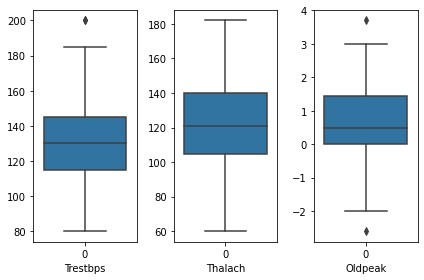

In [65]:
ig, axes = plt.subplots(1,3)
count = 0
for each_feature in continous_features[1:]:
    feature_data = df_switzerland[each_feature]
    ax = sns.boxplot(data = feature_data, orient='v', ax=axes[count])
    ax.set(xlabel='{}'.format(each_feature))
    count+=1

plt.tight_layout()


We can also see the outliers in the boxplot

In [66]:
outliers(df_switzerland[continous_features],drop=True)

Outliers from Age feature removed
Outliers from Trestbps feature removed
Outliers from Thalach feature removed
Outliers from Oldpeak feature removed


Removing outliers will give us more more strong correlations.

### **Correlations**

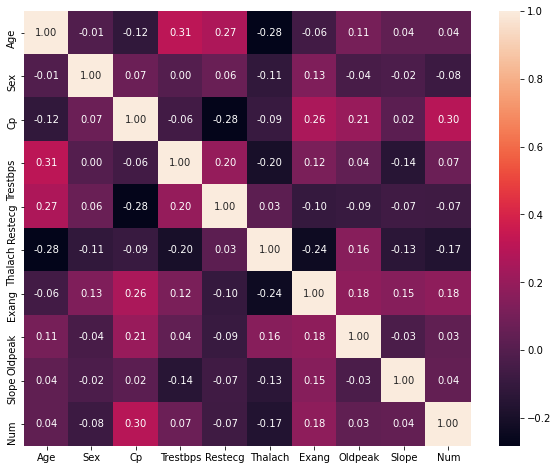

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(df_switzerland.corr(),cbar=True,
    annot=True,fmt='.2f',
  )
plt.show()

We can say that Cp has a good correlation with Num

### **Data Visualization**

In [68]:
df_switzerland['Num'] = df_switzerland.Num.replace({1: "Disease", 0: "No disease"})
df_switzerland['Sex'] = df_switzerland.Sex.replace({1: "Male", 0: "Female"})
df_switzerland['Cp'] = df_switzerland.Cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})

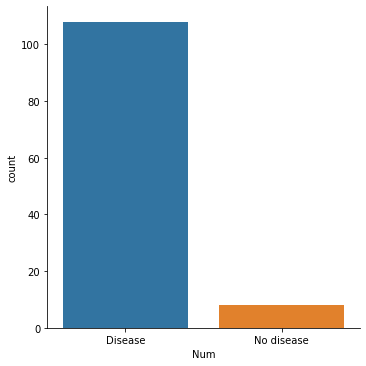

In [69]:
sns.catplot(kind="count", x="Num", data= df_switzerland)
plt.show()

We can see that in switzerland data we have less heart disease.

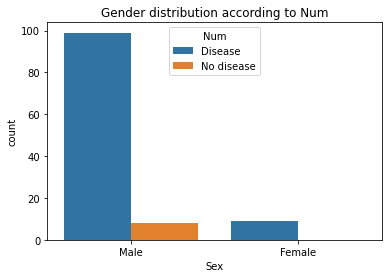

In [70]:
sns.countplot(x = 'Sex', data = df_switzerland, hue = 'Num')
plt.title('Gender distribution according to Num')
plt.show()

We can see the number of male and female who are suffering from heart disease.

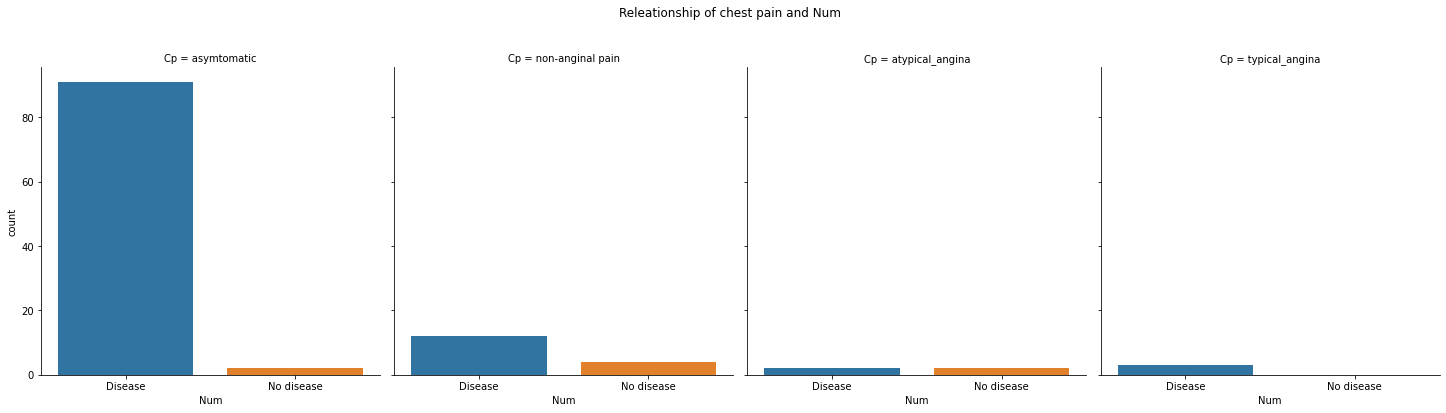

In [71]:
g= sns.catplot(kind = 'count', data = df_switzerland, x = 'Num', col="Cp")
g.fig.suptitle("Releationship of chest pain and Num",y=1.1)
plt.show()

## ***Hungarian***

I won't be explain each step again if it is not necessery. I did it in the first dataset

In [72]:
df_hungarian = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", header= None)
df_hungarian.columns = ['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num']
df_hungarian.head(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [73]:
df_hungarian.tail(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
293,65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


In [74]:
df_hungarian.shape

(294, 14)

In [75]:
df_hungarian.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num'],
      dtype='object')

In [76]:
df_hungarian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       294 non-null    int64  
 1   Sex       294 non-null    int64  
 2   Cp        294 non-null    int64  
 3   Trestbps  294 non-null    object 
 4   Chol      294 non-null    object 
 5   Fbs       294 non-null    object 
 6   Restecg   294 non-null    object 
 7   Thalach   294 non-null    object 
 8   Exang     294 non-null    object 
 9   Oldpeak   294 non-null    float64
 10  Slope     294 non-null    object 
 11  Ca        294 non-null    object 
 12  Thal      294 non-null    object 
 13  Num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [77]:
df_hungarian.nunique()

Age          38
Sex           2
Cp            4
Trestbps     32
Chol        154
Fbs           3
Restecg       4
Thalach      72
Exang         3
Oldpeak      10
Slope         4
Ca            2
Thal          4
Num           2
dtype: int64

In [78]:
df_hungarian.dtypes

Age           int64
Sex           int64
Cp            int64
Trestbps     object
Chol         object
Fbs          object
Restecg      object
Thalach      object
Exang        object
Oldpeak     float64
Slope        object
Ca           object
Thal         object
Num           int64
dtype: object

In [79]:
df_hungarian = df_hungarian.replace('?', np.nan) 

In [80]:
df_hungarian

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1


In [81]:
df_hungarian.isnull().sum()

Age           0
Sex           0
Cp            0
Trestbps      1
Chol         23
Fbs           8
Restecg       1
Thalach       1
Exang         1
Oldpeak       0
Slope       190
Ca          291
Thal        266
Num           0
dtype: int64

We have lots of missing values on columns Slope,Ca and Thal. There is no use to fill them with mean values so that I am going to remove them.

<AxesSubplot:>

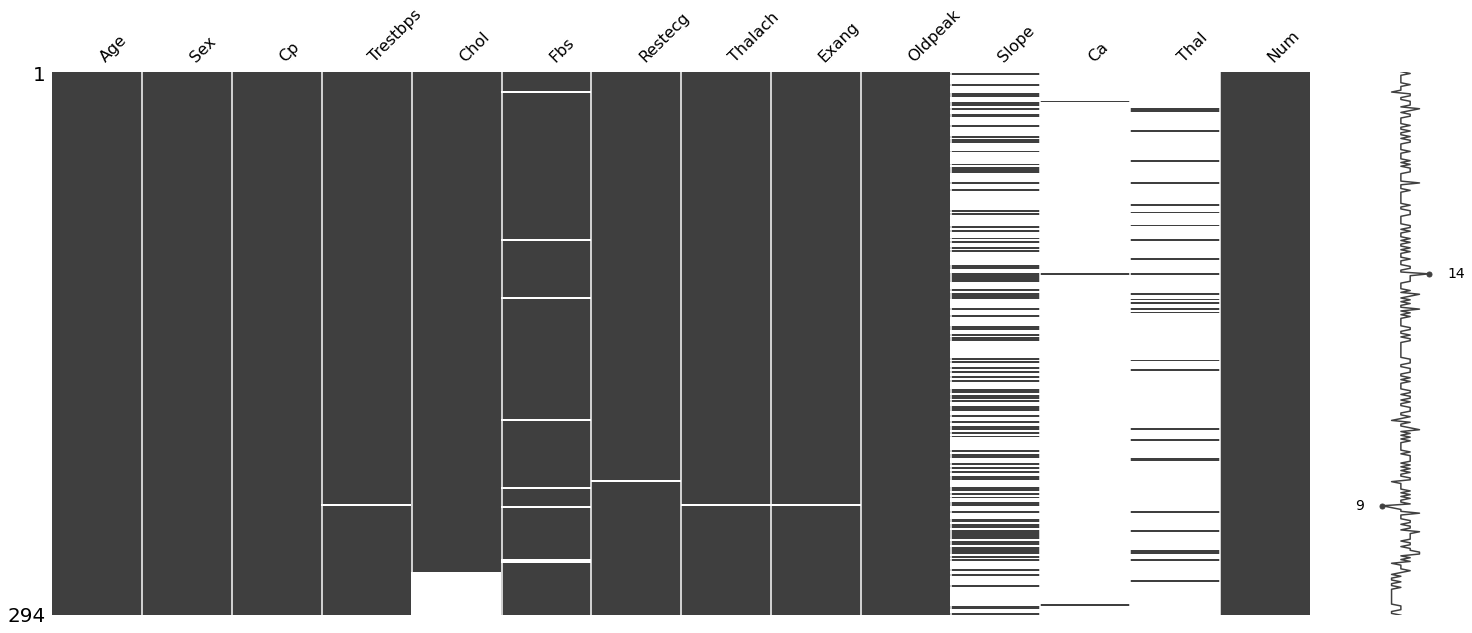

In [82]:
msno.matrix(df_hungarian.sort_values("Chol"))

We can also see missing values using missingno

- We have missing more than %50 of the data in Slope,Ca,Thal columns
- We can see that Trestbps, Fbs, Thalach, Exang has a few missing values. It could be MCAR or MAR.

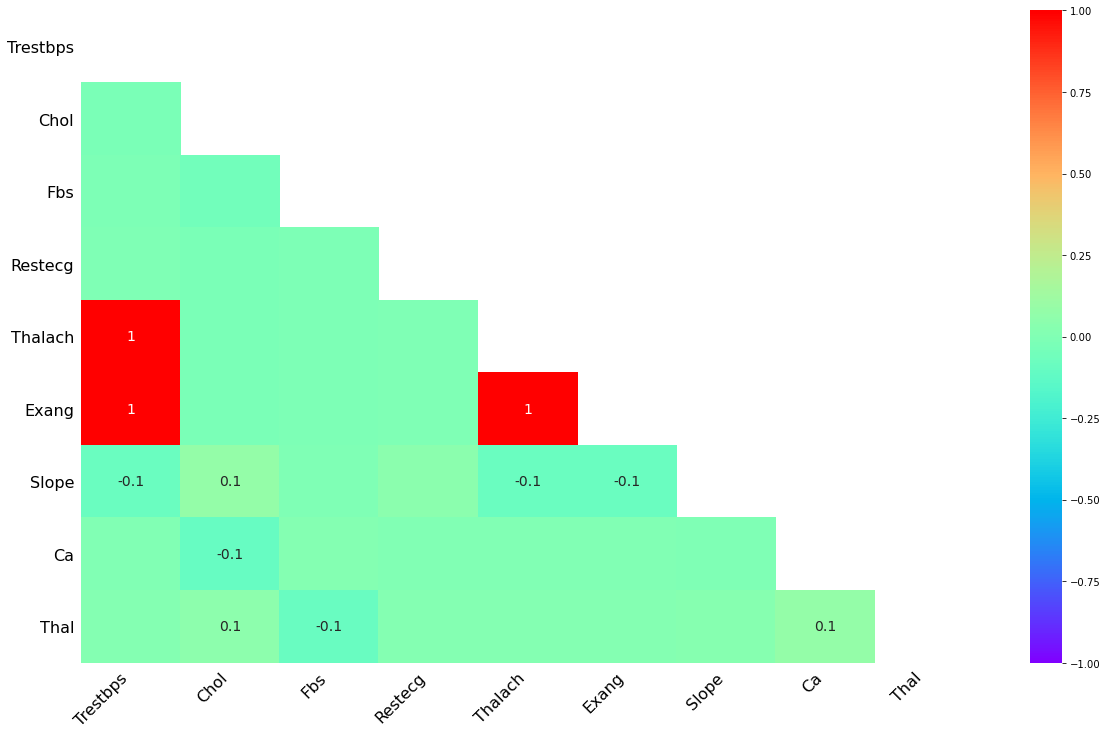

In [83]:
msno.heatmap(df_hungarian, cmap='rainbow');

- We can see that there are strong correlations between Thalact - Trestbps, Exang - Trestbps, Thalach - Exan which supports missingess is MAR.

In [84]:
duplicated = df_hungarian.duplicated().sum()

In [85]:
duplicated = df_hungarian[df_hungarian.duplicated(keep=False)]
duplicated.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
101,49,0,2,110,NaN,0,0,160,0,0.0,NaN,NaN,NaN,0
102,49,0,2,110,NaN,0,0,160,0,0.0,NaN,NaN,NaN,0


We can see that rows 101 and 102 are duplicated

In [86]:
df_hungarian.describe()

,Age,Sex,Cp,Oldpeak,Num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [87]:
df_hungarian['Num'].nunique()

2

In [88]:
df_hungarian['Num'].value_counts()

0    188
1    106
Name: Num, dtype: int64

In [89]:
df_hungarian = df_hungarian.apply(pd.to_numeric, errors='coerce')

In [90]:
df_hungarian.dtypes

Age           int64
Sex           int64
Cp            int64
Trestbps    float64
Chol        float64
Fbs         float64
Restecg     float64
Thalach     float64
Exang       float64
Oldpeak     float64
Slope       float64
Ca          float64
Thal        float64
Num           int64
dtype: object

In [91]:
df_hungarian.drop('Slope', axis=1, inplace=True)
df_hungarian.drop('Thal', axis=1, inplace=True)
df_hungarian.drop('Ca', axis=1, inplace=True)
df_hungarian

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


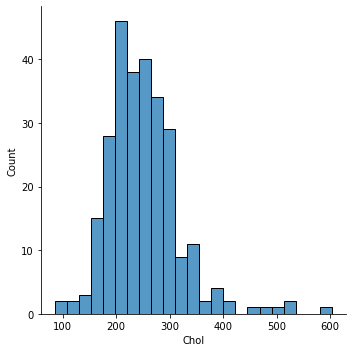

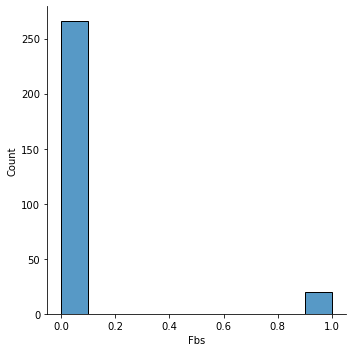

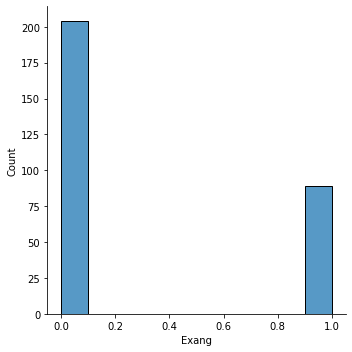

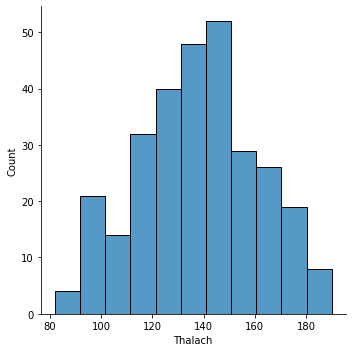

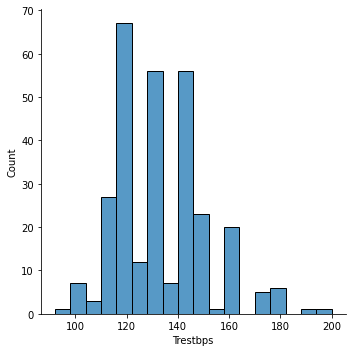

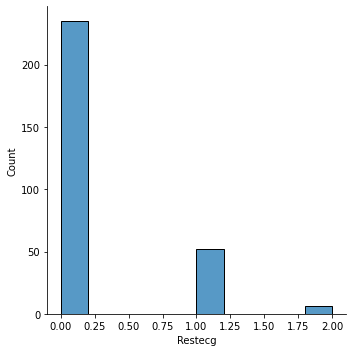

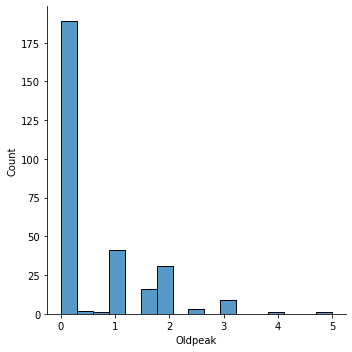

In [92]:
hungarian_missing=["Chol","Fbs","Exang","Thalach","Trestbps","Restecg","Oldpeak"]

for i in hungarian_missing:
    sns.displot(df_hungarian,x = i)
    
plt.tight_layout()

- Chol is continuous and it look like skewed, therefore, we can use use median.
- Oldpeak is continuous and it look like skewed, therefore, we can use use median.
- Thalac is also continuous and it look like symmetric distribution, therefore, we can use use mean.
- Trestbps is also continuous and it look like a bit skewed, therefore, we can use use median.
- Fbs is categorical and therefore, It is good to use mode.
- Restecg is categorical and therefore, It is good to use mode.
- Exang is categorical and therefore, It is good to use mode.

In [93]:
df_hungarian['Chol'] = df_hungarian.Chol.fillna(df_hungarian.Chol.median())
df_hungarian['Fbs'] = df_hungarian.Fbs.fillna(df_hungarian.Fbs.mode()[0])
df_hungarian['Exang'] = df_hungarian.Exang.fillna(df_hungarian.Exang.mode()[0])
df_hungarian['Thalach'] = df_hungarian.Thalach.fillna(df_hungarian.Thalach.mean())
df_hungarian['Trestbps'] = df_hungarian.Trestbps.fillna(df_hungarian.Trestbps.median())
df_hungarian['Oldpeak'] = df_hungarian.Oldpeak.fillna(df_hungarian.Oldpeak.median())
df_hungarian['Restecg'] = df_hungarian.Restecg.fillna(df_hungarian.Restecg.mode()[0])

In [94]:
df_hungarian

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,243.0,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


In [95]:
df_hungarian.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Num         0
dtype: int64

We filled missing values with mean

### **Outliers**

I am going to find outliers and remove them.
- Q3 is the median of the upper half of the data
- Q1 is the median of the lower half of the data
- IQR is the difference between Q3-Q1
- Outliers can be found as [Q1-1.5IQR,Q3+1.5IQR]

In [96]:
# define continuous variable & plot
continous_features = ['Age','Trestbps','Chol','Thalach','Oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_hungarian.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
            
outliers(df_hungarian[continous_features])


For the feature Age, No of Outliers is 0
For the feature Trestbps, No of Outliers is 8
For the feature Chol, No of Outliers is 14
For the feature Thalach, No of Outliers is 0
For the feature Oldpeak, No of Outliers is 11


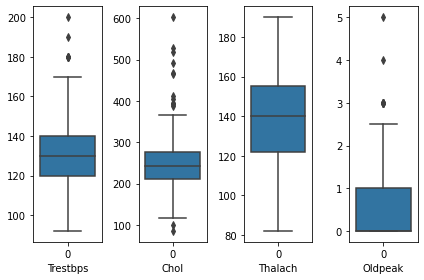

In [97]:
ig, axes = plt.subplots(1,4)
count = 0
for each_feature in continous_features[1:]:
    feature_data = df_hungarian[each_feature]
    ax = sns.boxplot(data = feature_data, orient='v', ax=axes[count])
    ax.set(xlabel='{}'.format(each_feature))
    count+=1

plt.tight_layout()

Outliers can be seen in the plot

In [98]:
outliers(df_hungarian[continous_features],drop=True)

Outliers from Age feature removed
Outliers from Trestbps feature removed
Outliers from Chol feature removed
Outliers from Thalach feature removed
Outliers from Oldpeak feature removed


Removing outliers will give us mroe strong correlations.

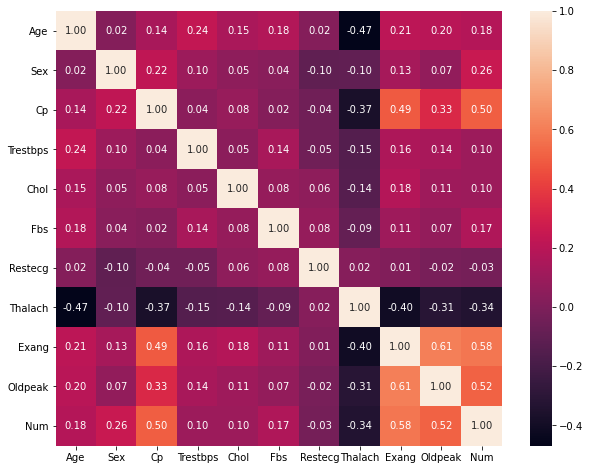

In [99]:
plt.figure(figsize=(10,8))
sns.heatmap(df_hungarian.corr(),cbar=True,
    annot=True,fmt='.2f',
  )
plt.show()

We can see that Cp,Exang and Olpeak has a good positive correlation with Num. On the other hand Thalach has a good negative correlation with Num. This is smilar to the Cleveland dataset


### **Data Visualization**

In [100]:
df_hungarian['Num'] = df_hungarian.Num.replace({1: "Disease", 0: "No disease"})
df_hungarian['Sex'] = df_hungarian.Sex.replace({1: "Male", 0: "Female"})
df_hungarian['Cp'] = df_hungarian.Cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})

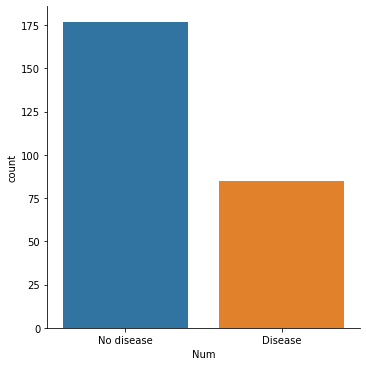

In [101]:
sns.catplot(kind="count", x="Num", data= df_hungarian)
plt.show()

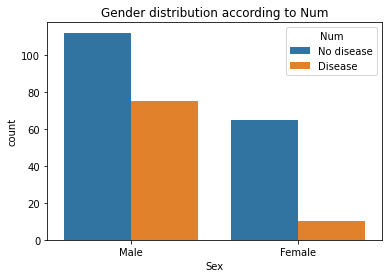

In [102]:
sns.countplot(x = 'Sex', data = df_hungarian, hue = 'Num')
plt.title('Gender distribution according to Num')
plt.show()

We can see that the female and male graphs looks similar

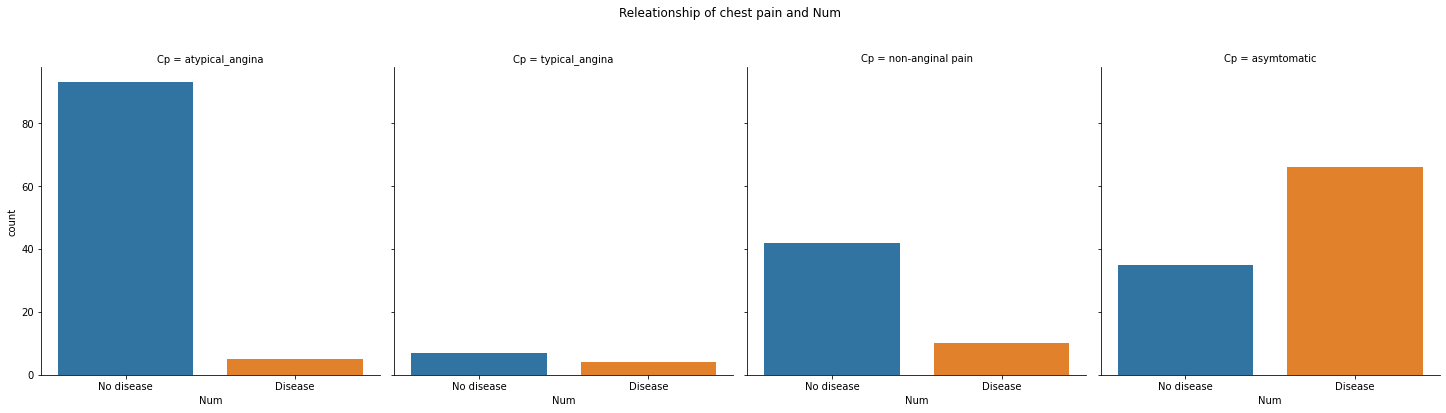

In [103]:
g= sns.catplot(kind = 'count', data = df_hungarian, x = 'Num', col="Cp")
g.fig.suptitle("Releationship of chest pain and Num",y=1.1)
plt.show()

It can be concluded that patients who has asymtomatic chest pain are likely have a heart disease.

## ***Va***

In [104]:
df_va = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", header= None)
df_va.columns = ['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num']
df_va.head(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [105]:
df_va.tail(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0
199,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [106]:
df_va.shape

(200, 14)

In [107]:
df_va.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num'],
      dtype='object')

In [108]:
df_va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       200 non-null    int64 
 1   Sex       200 non-null    int64 
 2   Cp        200 non-null    int64 
 3   Trestbps  200 non-null    object
 4   Chol      200 non-null    object
 5   Fbs       200 non-null    object
 6   Restecg   200 non-null    int64 
 7   Thalach   200 non-null    object
 8   Exang     200 non-null    object
 9   Oldpeak   200 non-null    object
 10  Slope     200 non-null    object
 11  Ca        200 non-null    object
 12  Thal      200 non-null    object
 13  Num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [109]:
df_va.nunique()

Age          39
Sex           2
Cp            4
Trestbps     41
Chol        100
Fbs           3
Restecg       3
Thalach      60
Exang         3
Oldpeak      15
Slope         4
Ca            2
Thal          4
Num           5
dtype: int64

In [110]:
df_va = df_va.replace('?', np.nan) 

In [111]:
df_va.isnull().sum()

Age           0
Sex           0
Cp            0
Trestbps     56
Chol          7
Fbs           7
Restecg       0
Thalach      53
Exang        53
Oldpeak      56
Slope       102
Ca          198
Thal        166
Num           0
dtype: int64

We can see that again we have lots of missing values. I will be replacing missing Fbs and Chol columns with mean.

<AxesSubplot:>

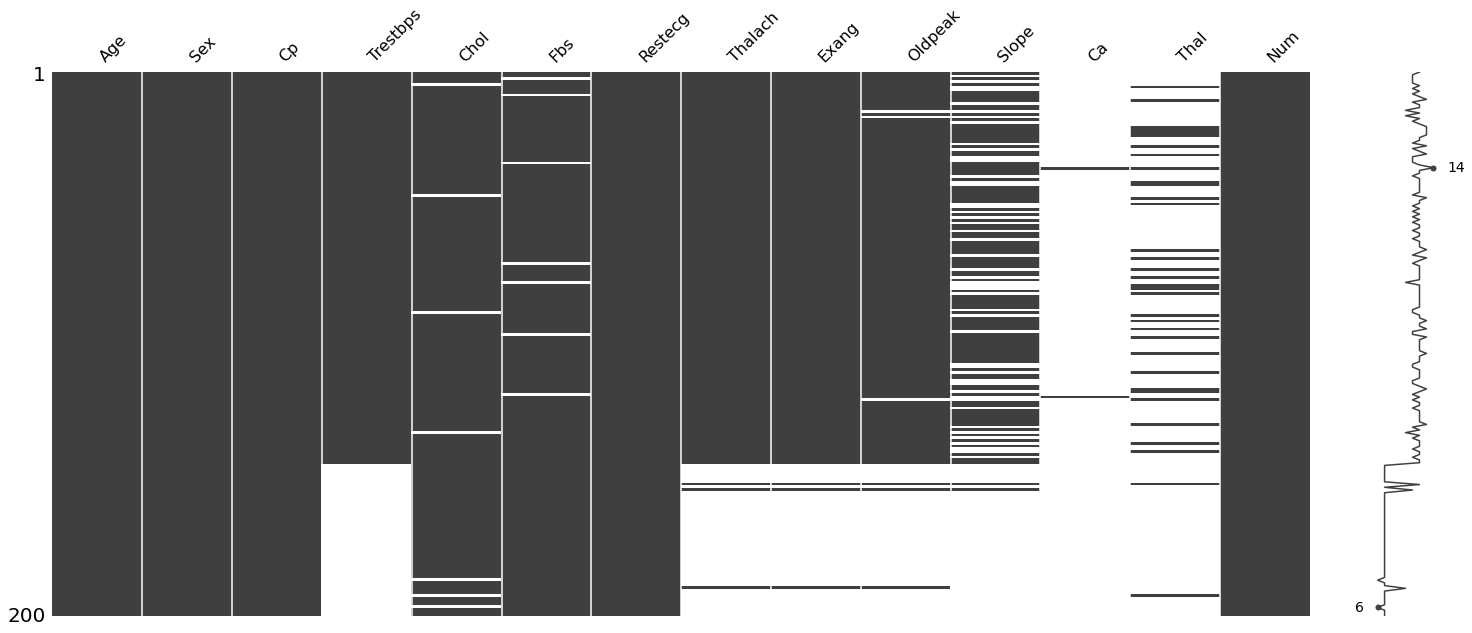

In [112]:
msno.matrix(df_va.sort_values("Trestbps"))

We can also see missing values using missingno

- Chol, Fbs, Oldpeak has a few missing points seems randomly scattered. It could be MCAR.
- We are missing a lot of data in the Ca and Thal which can be lead to dropping columns.

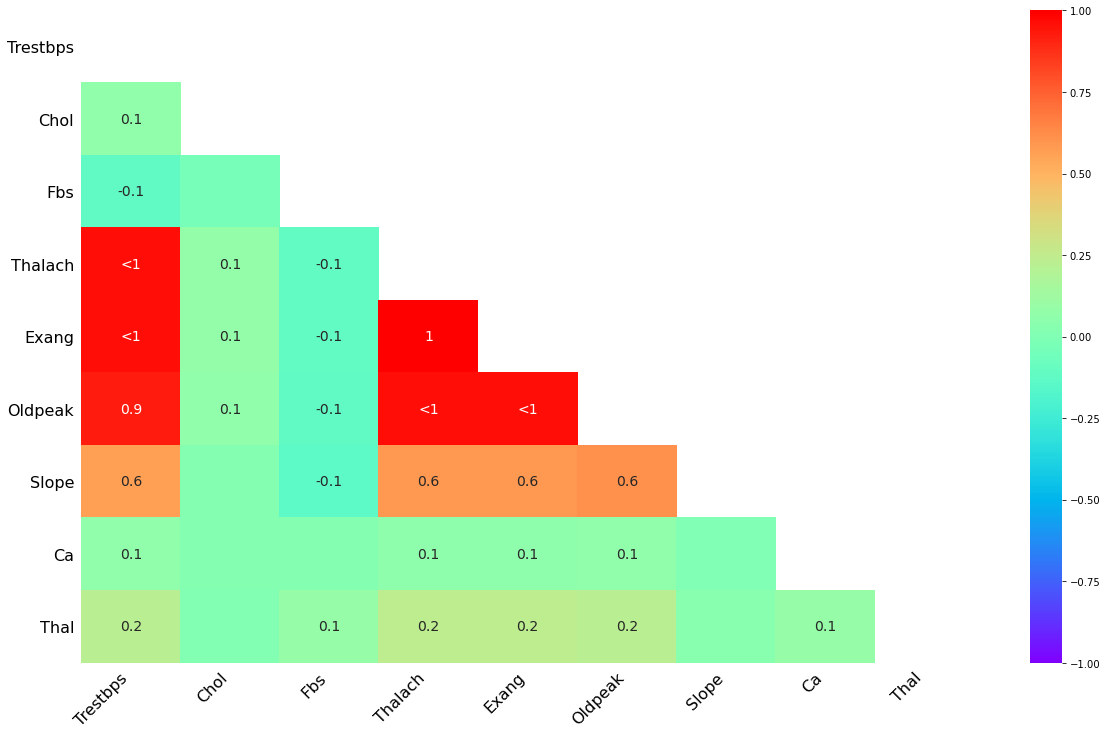

In [113]:
msno.heatmap(df_va, cmap='rainbow');

- We can see that there are good correlations between Thalact - Slope, Exang - Slope, Oldpeak - Slope and Trestbps - Slope which supports missingess is MAR.
- We can see that there are strong correlations between Trestbps - Thalac, Trestbps - Exang, Trestbps - Oldpeak, Thalac - Exang and Exang - Oldpeak which also supports missingess is MAR.

In [114]:
duplicated_va = df_va.duplicated().sum()

In [115]:
duplicated_va = df_va[df_va.duplicated(keep=False)]
duplicated_va.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
139,58,1,3,150,219,0,1,118,1,0,NaN,NaN,NaN,2
187,58,1,3,150,219,0,1,118,1,0,NaN,NaN,NaN,2


In [116]:
df_va.describe()

,Age,Sex,Cp,Restecg,Num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [117]:
df_va['Num'].nunique()

5

In [118]:
df_va['Num'].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: Num, dtype: int64

In [119]:
df_va['Num'] = df_va.Num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [120]:
df_va = df_va.apply(pd.to_numeric, errors='coerce')

In [121]:
df_va.dtypes

Age           int64
Sex           int64
Cp            int64
Trestbps    float64
Chol        float64
Fbs         float64
Restecg       int64
Thalach     float64
Exang       float64
Oldpeak     float64
Slope       float64
Ca          float64
Thal        float64
Num           int64
dtype: object

In [122]:
df_va.drop('Slope', axis=1, inplace=True)
df_va.drop('Thal', axis=1, inplace=True)
df_va.drop('Ca', axis=1, inplace=True)
df_va

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,1
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,0


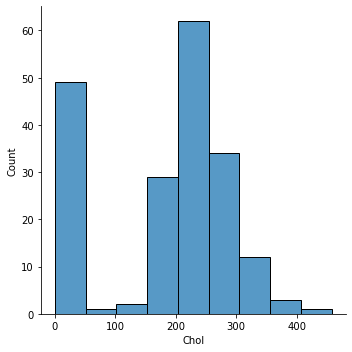

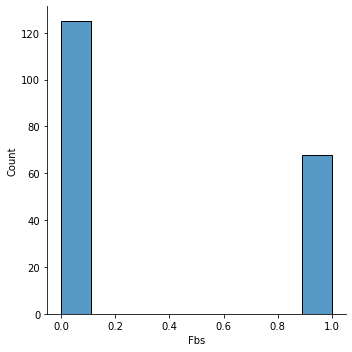

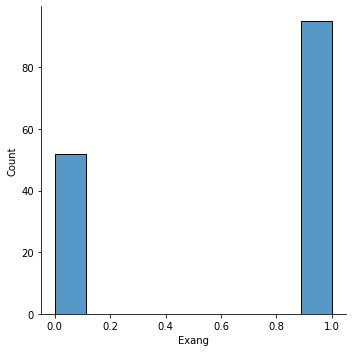

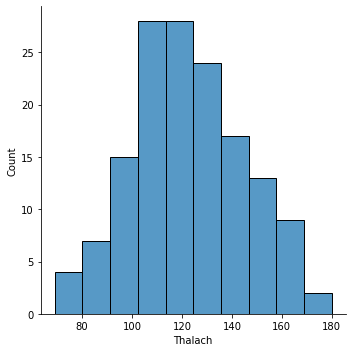

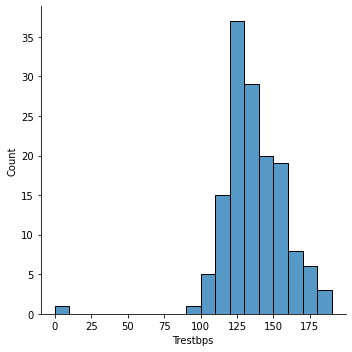

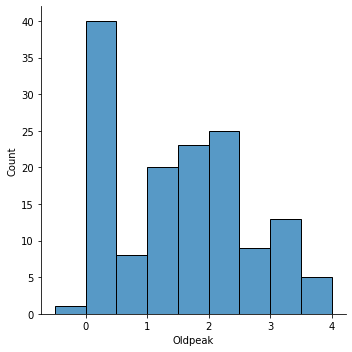

In [123]:
va_missing=["Chol","Fbs","Exang","Thalach","Trestbps","Oldpeak"]

for i in va_missing:
    sns.displot(df_va,x = i)
    
plt.tight_layout()

- Chol is continuous and it look like skewed, therefore, we can use use median.
- Oldpeak is continuous and it look like skewed, therefore, we can use use median.
- Thalac is also continuous and it look like symmetric distribution, therefore, we can use use mean.
- Trestbps is also continuous and it look like a bit skewed, therefore, we can use use median.
- Fbs is categorical and therefore, It is good to use mode.
- Exang is categorical and therefore, It is good to use mode.

In [124]:
df_va['Chol'] = df_va.Chol.fillna(df_va.Chol.median())
df_va['Fbs'] = df_va.Fbs.fillna(df_va.Fbs.mode()[0])
df_va['Trestbps'] = df_va.Trestbps.fillna(df_va.Trestbps.mean())
df_va['Oldpeak'] = df_va.Oldpeak.fillna(df_va.Oldpeak.median())
df_va['Exang'] = df_va.Exang.fillna(df_va.Exang.mode()[0])
df_va['Thalach'] = df_va.Thalach.fillna(df_va.Thalach.median())

In [125]:
df_va.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Num         0
dtype: int64

### **Outliers**

I am going to find outliers and remove them.
- Q3 is the median of the upper half of the data
- Q1 is the median of the lower half of the data
- IQR is the difference between Q3-Q1
- Outliers can be found as [Q1-1.5IQR,Q3+1.5IQR]

In [126]:
# define continuous variable & plot
continous_features = ['Age','Trestbps','Chol','Thalach','Oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_va.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
            
outliers(df_va[continous_features])


For the feature Age, No of Outliers is 7
For the feature Trestbps, No of Outliers is 15
For the feature Chol, No of Outliers is 1
For the feature Thalach, No of Outliers is 18
For the feature Oldpeak, No of Outliers is 4


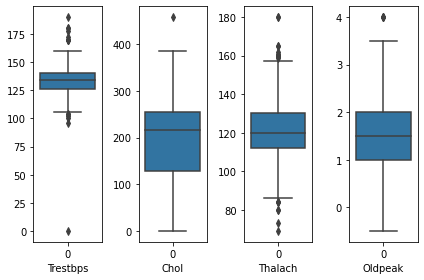

In [127]:
ig, axes = plt.subplots(1,4)
count = 0
for each_feature in continous_features[1:]:
    feature_data = df_va[each_feature]
    ax = sns.boxplot(data = feature_data, orient='v', ax=axes[count])
    ax.set(xlabel='{}'.format(each_feature))
    count+=1

plt.tight_layout()

In [128]:
outliers(df_va[continous_features],drop=True)

Outliers from Age feature removed
Outliers from Trestbps feature removed
Outliers from Chol feature removed
Outliers from Thalach feature removed
Outliers from Oldpeak feature removed


### **Correlations**

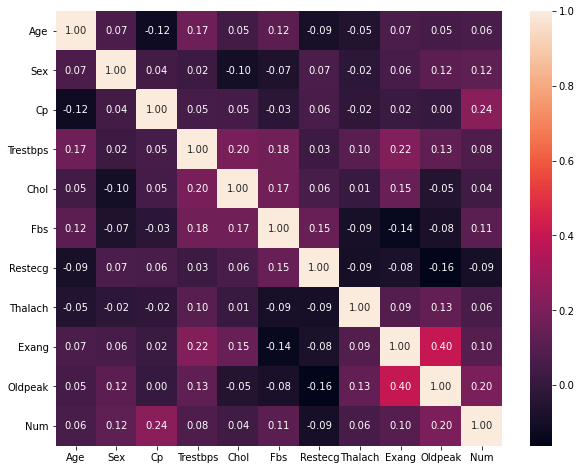

In [129]:
plt.figure(figsize=(10,8))
sns.heatmap(df_va.corr(),cbar=True,
    annot=True,fmt='.2f',
  )
plt.show()

We can say that Oldpeak and Cp have a good positive correlation with Num

### **Data Visualization**

In [130]:
df_va['Num'] = df_va.Num.replace({1: "Disease", 0: "No disease"})
df_va['Sex'] = df_va.Sex.replace({1: "Male", 0: "Female"})
df_va['Cp'] = df_va.Cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})

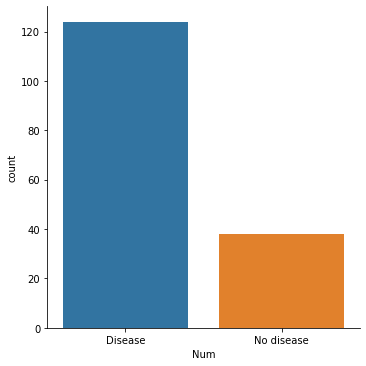

In [131]:
sns.catplot(kind="count", x="Num", data= df_va)
plt.show()

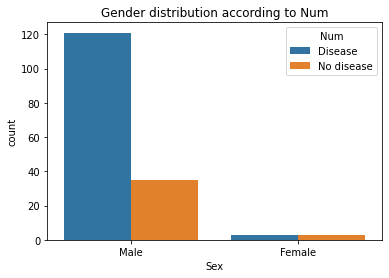

In [132]:
sns.countplot(x = 'Sex', data = df_va, hue = 'Num')
plt.title('Gender distribution according to Num')
plt.show()

We can see the number of male and female who suffering heart disease. Furthermore, it is strange that there are few female person in the dataset.

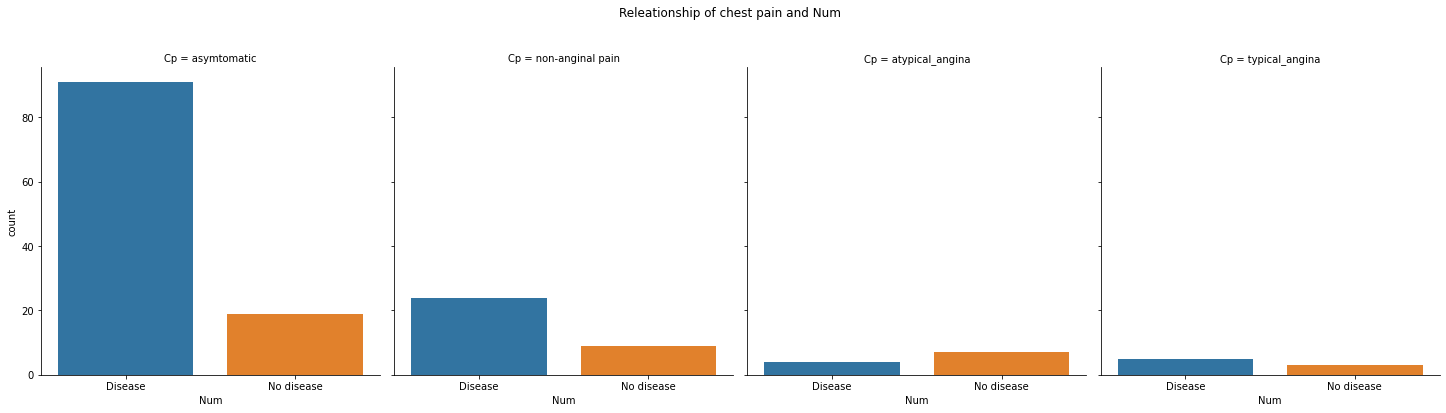

In [133]:
g= sns.catplot(kind = 'count', data = df_va, x = 'Num', col="Cp")
g.fig.suptitle("Releationship of chest pain and Num",y=1.1)
plt.show()

According to this plots, it seems like none of the cp types have an big impact on heart disease which is strange because other datasets showed differently.

## ***Combining 4 Datasets***

We are going to combine our datasets. 
- We can do this because the structure of the datasets are similar and using more data helps generalise during the training of the model. 
- It ensures data diversity.
- Outliers are easier to classify and the underlying distribution of that data is clearer.
- Research show that more data can lead better predictive results. Furthermore, the probability that it contains useful information is increased.
- But of course Quality > Quantity - if the newly created data resemble the existing data, or simply repeated data, then there is no added value of having more data.


In [134]:
df_combine = pd.concat([df_cleveland, df_hungarian,df_switzerland,df_va])
#default join = outer
df_combine.head(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,Male,typical_angina,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,No disease
1,67.0,Male,asymtomatic,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,Disease
2,67.0,Male,asymtomatic,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,Disease
3,37.0,Male,non-anginal pain,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,No disease
4,41.0,Female,atypical_angina,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,No disease


In [135]:
df_combine.tail(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
195,54.0,Female,asymtomatic,127.000000,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,Disease
196,62.0,Male,typical_angina,133.763889,139.0,0.0,1.0,120.0,1.0,1.5,NaN,NaN,NaN,No disease
197,55.0,Male,asymtomatic,122.000000,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,NaN,Disease
198,58.0,Male,asymtomatic,133.763889,385.0,1.0,2.0,120.0,1.0,1.5,NaN,NaN,NaN,No disease
199,62.0,Male,atypical_angina,120.000000,254.0,0.0,2.0,93.0,1.0,0.0,NaN,NaN,NaN,Disease


In [136]:
df_combine.shape

(824, 14)

In [137]:
df_combine.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num'],
      dtype='object')

In [138]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       824 non-null    float64
 1   Sex       824 non-null    object 
 2   Cp        824 non-null    object 
 3   Trestbps  824 non-null    float64
 4   Chol      708 non-null    float64
 5   Fbs       708 non-null    float64
 6   Restecg   824 non-null    float64
 7   Thalach   824 non-null    float64
 8   Exang     824 non-null    float64
 9   Oldpeak   824 non-null    float64
 10  Slope     400 non-null    float64
 11  Ca        284 non-null    float64
 12  Thal      284 non-null    float64
 13  Num       824 non-null    object 
dtypes: float64(11), object(3)
memory usage: 96.6+ KB


In [139]:
df_combine.nunique()

Age          50
Sex           2
Cp            4
Trestbps     54
Chol        195
Fbs           2
Restecg       3
Thalach     114
Exang         2
Oldpeak      47
Slope         3
Ca            4
Thal          3
Num           2
dtype: int64

In [140]:
df_combine = df_combine.replace('?', np.nan) 

In [141]:
df_combine.isnull().sum()

Age           0
Sex           0
Cp            0
Trestbps      0
Chol        116
Fbs         116
Restecg       0
Thalach       0
Exang         0
Oldpeak       0
Slope       424
Ca          540
Thal        540
Num           0
dtype: int64

In [142]:
df_combine.isnull().mean() * 100

Age          0.000000
Sex          0.000000
Cp           0.000000
Trestbps     0.000000
Chol        14.077670
Fbs         14.077670
Restecg      0.000000
Thalach      0.000000
Exang        0.000000
Oldpeak      0.000000
Slope       51.456311
Ca          65.533981
Thal        65.533981
Num          0.000000
dtype: float64

<AxesSubplot:>

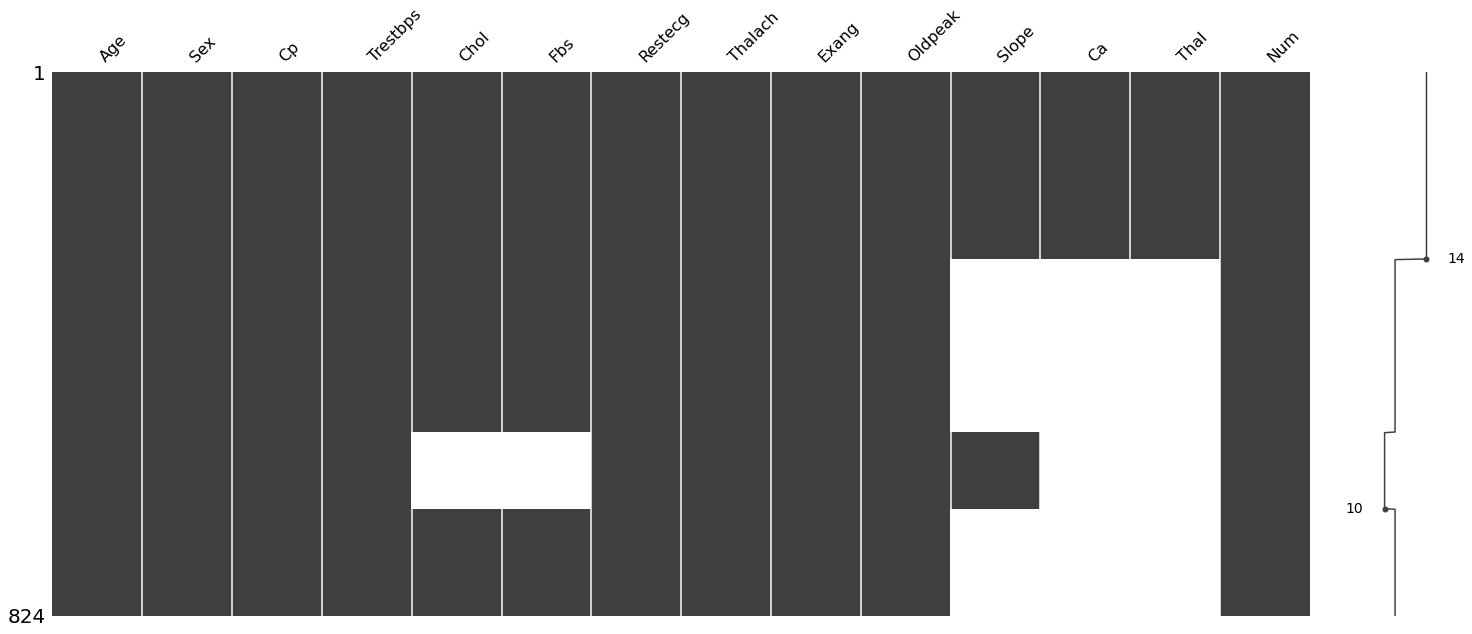

In [143]:
msno.matrix(df_combine)

We can also see using missing no that there are lots of missing values.

- We can clearly see that there is strong a correlation of missingness between Chol and Fbs. Therefore, missingness is MAR.
- More than %50 of data missing in Slope,Ca and Thal columns.

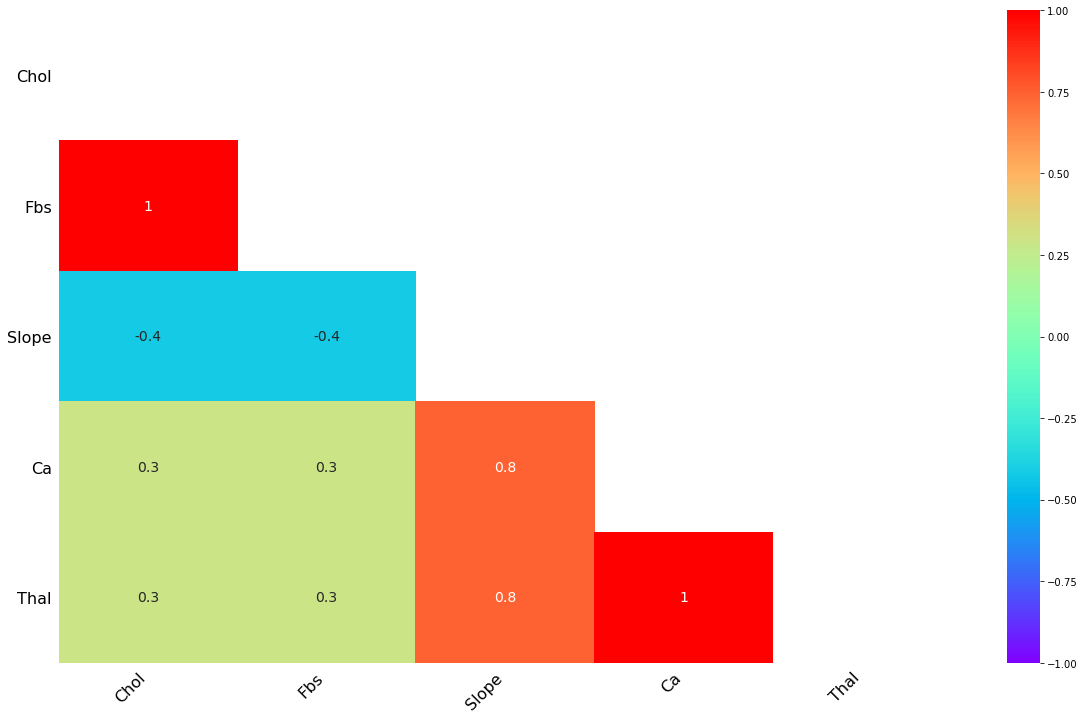

In [144]:
msno.heatmap(df_combine, cmap='rainbow');

- In the heatmap, it is also obvious that missingness of Ca and Fbs correlated.

In [145]:
df_combine.describe()

,Age,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal
count,824.000000,824.000000,708.000000,708.000000,824.000000,824.000000,824.000000,824.000000,400.000000,284.000000,284.000000
mean,53.468447,130.806093,228.200565,0.158192,0.595874,137.068795,0.411408,0.831395,1.650000,0.637324,4.658451
std,9.362367,15.666512,70.771776,0.365179,0.810342,25.176681,0.492388,0.948462,0.606977,0.904727,1.927914
min,28.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.000000,1.000000,0.000000,3.000000
25%,47.000000,120.000000,204.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,54.000000,130.000000,234.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,0.000000,3.000000
75%,60.000000,140.000000,269.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000,7.000000
max,77.000000,185.000000,385.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000


In [146]:
df_combine['Sex'] = df_combine.Sex.map({'Female': 0, 'Male': 1})
df_combine['Num'] = df_combine.Num.map({'No disease': 0, 'Disease': 1})
df_combine['Cp'] = df_combine.Cp.map({"typical_angina": 1, 
                          "atypical_angina": 2, 
                          "non-anginal pain":3,
                          "asymtomatic": 4})

In [147]:
df_combine['Num'].nunique()

2

In [148]:
df_combine['Num'].value_counts()

1    443
0    381
Name: Num, dtype: int64

Because more than %50 of data missing in Slope,Ca and Thal columns, i will drop them.

In [149]:
df_combine.drop('Slope', axis=1, inplace=True)
df_combine.drop('Thal', axis=1, inplace=True)
df_combine.drop('Ca', axis=1, inplace=True)
df_combine

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Num
0,63.0,1,1,145.000000,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67.0,1,4,160.000000,286.0,0.0,2.0,108.0,1.0,1.5,1
2,67.0,1,4,120.000000,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37.0,1,3,130.000000,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41.0,0,2,130.000000,204.0,0.0,2.0,172.0,0.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0,4,127.000000,333.0,1.0,1.0,154.0,0.0,0.0,1
196,62.0,1,1,133.763889,139.0,0.0,1.0,120.0,1.0,1.5,0
197,55.0,1,4,122.000000,223.0,1.0,1.0,100.0,0.0,0.0,1
198,58.0,1,4,133.763889,385.0,1.0,2.0,120.0,1.0,1.5,0


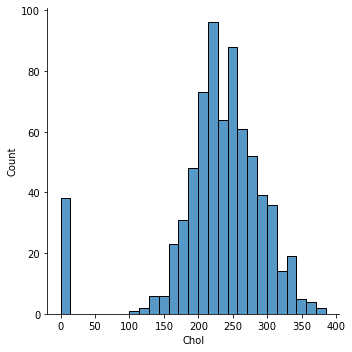

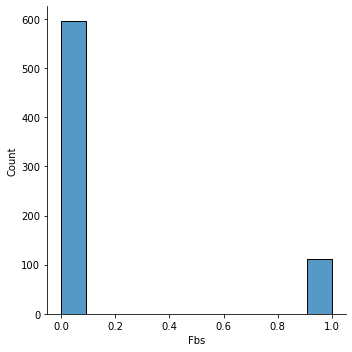

In [150]:
combine_missing=["Chol","Fbs"]

for i in combine_missing:
    sns.displot(df_combine,x = i)
    
plt.tight_layout()

- Chol is continuous and it look like skewed, therefore, we can use use median.
- Fbs is categorical and therefore, It is good to use mode.

In [151]:
df_combine['Chol'] = df_combine.Chol.fillna(df_combine.Chol.median())
df_combine['Fbs'] = df_combine.Fbs.fillna(df_combine.Fbs.mode()[0])

In [152]:
df_combine.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Num         0
dtype: int64

if we check again, we can see that we filled all the NaN valus

### **Outliers**

I am going to find outliers and remove them.
- Q3 is the median of the upper half of the data
- Q1 is the median of the lower half of the data
- IQR is the difference between Q3-Q1
- Outliers can be found as [Q1-1.5IQR,Q3+1.5IQR]

In [153]:
# define continuous variable & plot
continous_features = ['Age','Trestbps','Chol','Thalach','Oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_combine.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
            
outliers(df_combine[continous_features])

For the feature Age, No of Outliers is 0
For the feature Trestbps, No of Outliers is 3
For the feature Chol, No of Outliers is 53
For the feature Thalach, No of Outliers is 2
For the feature Oldpeak, No of Outliers is 2


In [154]:
outliers(df_combine[continous_features],drop=True)

Outliers from Age feature removed
Outliers from Trestbps feature removed
Outliers from Chol feature removed
Outliers from Thalach feature removed
Outliers from Oldpeak feature removed


### **Correlations**

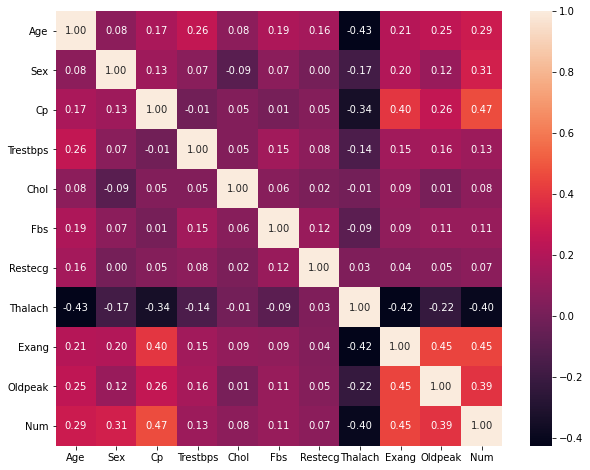

In [155]:
plt.figure(figsize=(10,8))
sns.heatmap(df_combine.corr(),cbar=True,
    annot=True,fmt='.2f',
  )
plt.show()

We can see that Cp, Exang have strong positive correlation with Num. Furthermore, Thalach has a good negative correlation with Num.

### **Data Visualization**

In [156]:
df_combine['Num'] = df_combine.Num.replace({1: "Disease", 0: "No disease"})
df_combine['Sex'] = df_combine.Sex.replace({1: "Male", 0: "Female"})
df_combine['Cp'] = df_combine.Cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})

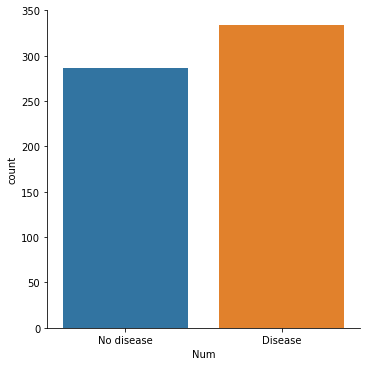

In [157]:
sns.catplot(kind="count", x="Num", data= df_combine)
plt.show()

We can see that when we combine 4 datasets the number of people who suffering from heart disease increased.

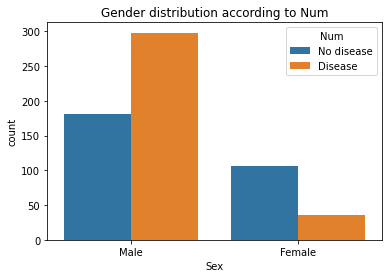

In [158]:
sns.countplot(x = 'Sex', data = df_combine, hue = 'Num')
plt.title('Gender distribution according to Num')
plt.show()

We can see the number of male and female who are suffering from heart disease. According to this dataset, it can be concluded that mens are more likely to have heart disease.

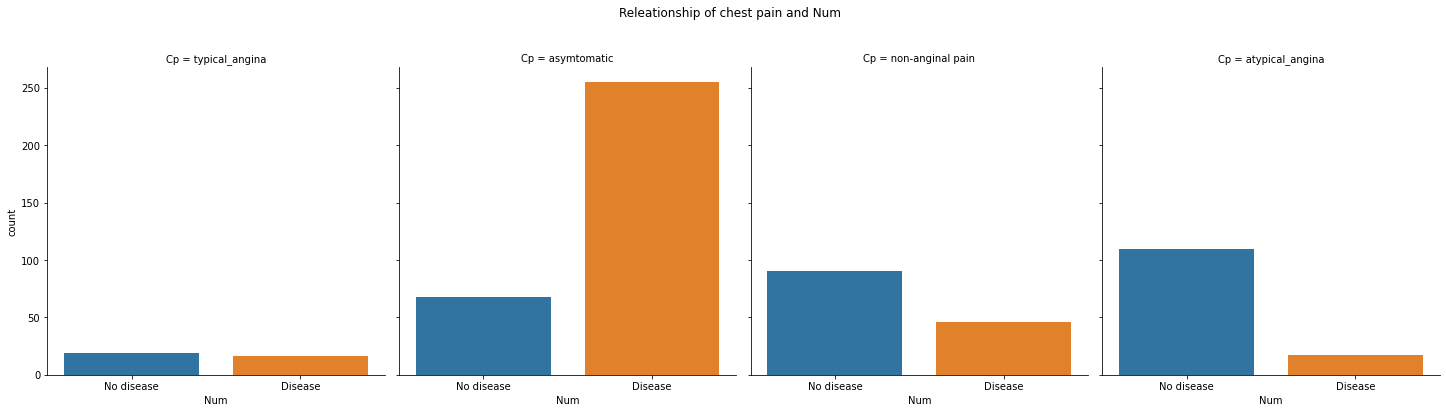

In [159]:
g= sns.catplot(kind = 'count', data = df_combine, x = 'Num', col="Cp")
g.fig.suptitle("Releationship of chest pain and Num",y=1.1)
plt.show()

We can say that asymtomatic chest pain has a more influence on having a heart disease